In [3]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train_0OECtn8.csv')

In [5]:
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [6]:
print(len(df))
print(df.isnull().sum())
print(df.info())


89197
row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB
None


In [7]:
print(df.describe())

             row_id       user_id  ...         views  engagement_score
count  89197.000000  89197.000000  ...  89197.000000      89197.000000
mean   44599.000000  13881.909806  ...    502.980268          3.487797
std    25749.100318   8005.582771  ...    268.569482          0.863498
min        1.000000      1.000000  ...     30.000000          0.000000
25%    22300.000000   6945.000000  ...    229.000000          2.900000
50%    44599.000000  13892.000000  ...    467.000000          3.710000
75%    66898.000000  20819.000000  ...    714.000000          4.150000
max    89197.000000  27734.000000  ...   1000.000000          5.000000

[8 rows x 8 columns]


In [8]:
df['gender'].value_counts()

df['gender_converted'] = pd.get_dummies(df['gender'], drop_first= True)

print(df.head())

   row_id  user_id  category_id  ...  views  engagement_score gender_converted
0       1    19990           37  ...   1000              4.33                1
1       2     5304           32  ...    714              1.79                0
2       3     1840           12  ...    138              4.35                1
3       4    12597           23  ...    613              3.77                1
4       5    13626           23  ...    613              3.13                1

[5 rows x 11 columns]


In [9]:
df['profession'].value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
df['profession'] = label_encode.fit_transform(df['profession'])
print(df.head())

   row_id  user_id  category_id  ...  views  engagement_score gender_converted
0       1    19990           37  ...   1000              4.33                1
1       2     5304           32  ...    714              1.79                0
2       3     1840           12  ...    138              4.35                1
3       4    12597           23  ...    613              3.77                1
4       5    13626           23  ...    613              3.13                1

[5 rows x 11 columns]


In [11]:
new_df = df.drop(columns=['gender', 'row_id'], axis='columns')

new_df.head()


,user_id,category_id,video_id,age,profession,followers,views,engagement_score,gender_converted
0,19990,37,128,24,1,180,1000,4.33,1
1,5304,32,132,14,1,330,714,1.79,0
2,1840,12,24,19,1,180,138,4.35,1
3,12597,23,112,19,1,220,613,3.77,1
4,13626,23,112,27,2,220,613,3.13,1


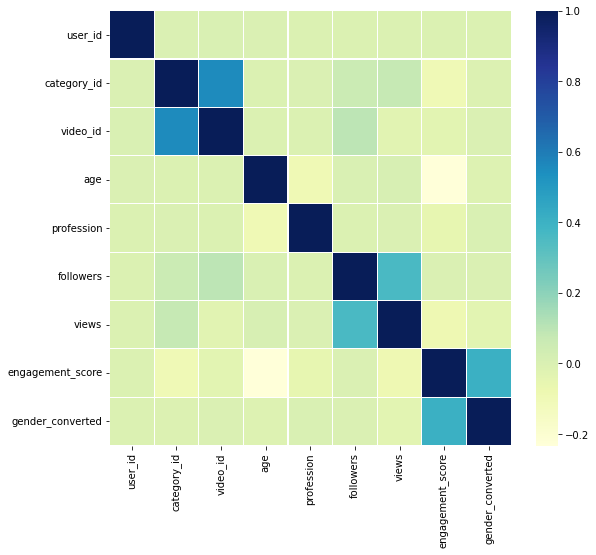

In [12]:
corr_mat = new_df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [13]:
# Standard scalar

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
arr = scalar.fit_transform(new_df)
arr


array([[ 0.76298311,  1.59966809,  1.03745113, ...,  1.85062917,
         0.97534408,  0.83805148],
       [-1.071497  ,  1.17140583,  1.11997745, ...,  0.78572187,
        -1.96619614, -1.19324412],
       [-1.50419746, -0.54164323, -1.10823324, ..., -1.35898655,
         0.99850582,  0.83805148],
       ...,
       [-0.0283441 , -0.19903342,  0.39787213, ..., -0.15258807,
         0.85953541,  0.83805148],
       [ 1.36881373, -0.79860059, -1.23202273, ...,  1.17668434,
         0.32681553,  0.83805148],
       [ 1.66148613,  0.57183866,  1.4913459 , ..., -0.69248862,
         0.95218235,  0.83805148]])

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame() # Empty data frame
vif_df['vif_values'] = [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]
vif_df['feature'] = new_df.columns
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,vif_values,feature
0,1.000065,user_id
1,1.483224,category_id
2,1.482582,video_id
3,1.079872,age
4,1.014999,profession
5,1.169464,followers
6,1.181422,views
7,1.310851,engagement_score
8,1.214244,gender_converted


In [15]:
new_df

,user_id,category_id,video_id,age,profession,followers,views,engagement_score,gender_converted
0,19990,37,128,24,1,180,1000,4.33,1
1,5304,32,132,14,1,330,714,1.79,0
2,1840,12,24,19,1,180,138,4.35,1
3,12597,23,112,19,1,220,613,3.77,1
4,13626,23,112,27,2,220,613,3.13,1
...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,0,340,662,3.91,1
89193,20466,20,47,31,0,240,892,3.56,1
89194,13655,16,97,25,1,270,462,4.23,1
89195,24840,9,18,35,2,230,819,3.77,1


In [16]:
test_df = pd.read_csv('final_test_data.csv')
test_df

,user_id,category_id,video_id,age,profession,followers,views,gender_converted
0,7986,12,42,14,1,180,138,1
1,11278,34,115,14,1,230,840,1
2,17245,8,110,44,2,280,628,0
3,9851,16,137,18,1,270,462,1
4,16008,34,96,47,0,230,840,0
...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,1,240,317,1
11117,6772,8,100,19,1,280,628,0
11118,2042,16,98,22,1,270,462,1
11119,24626,8,16,33,0,280,628,1


In [17]:
final_df=pd.concat([new_df,test_df],axis=0)

In [18]:
final_df

,user_id,category_id,video_id,age,profession,followers,views,engagement_score,gender_converted
0,19990,37,128,24,1,180,1000,4.33,1
1,5304,32,132,14,1,330,714,1.79,0
2,1840,12,24,19,1,180,138,4.35,1
3,12597,23,112,19,1,220,613,3.77,1
4,13626,23,112,27,2,220,613,3.13,1
...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,1,240,317,NaN,1
11117,6772,8,100,19,1,280,628,NaN,0
11118,2042,16,98,22,1,270,462,NaN,1
11119,24626,8,16,33,0,280,628,NaN,1


In [19]:
final_df.isnull().sum()

user_id                 0
category_id             0
video_id                0
age                     0
profession              0
followers               0
views                   0
engagement_score    11121
gender_converted        0
dtype: int64

In [20]:
final_df['engagement_score']

0        4.33
1        1.79
2        4.35
3        3.77
4        3.13
         ... 
11116     NaN
11117     NaN
11118     NaN
11119     NaN
11120     NaN
Name: engagement_score, Length: 100318, dtype: float64

In [21]:
final_df.shape

(100318, 9)

In [22]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [23]:
columns = ['user_id'	,'category_id'	'video_id',	'age'	,'profession',	'followers	views'	'engagement_score',	'gender_converted']

In [24]:
final_df

,user_id,category_id,video_id,age,profession,followers,views,engagement_score,gender_converted
0,19990,37,128,24,1,180,1000,4.33,1
1,5304,32,132,14,1,330,714,1.79,0
2,1840,12,24,19,1,180,138,4.35,1
3,12597,23,112,19,1,220,613,3.77,1
4,13626,23,112,27,2,220,613,3.13,1
...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,1,240,317,NaN,1
11117,6772,8,100,19,1,280,628,NaN,0
11118,2042,16,98,22,1,270,462,NaN,1
11119,24626,8,16,33,0,280,628,NaN,1


In [25]:
import statistics

a = statistics.median(final_df['engagement_score'])
a

3.8

In [26]:
result = final_df.fillna(a)

In [27]:
result.head()

,user_id,category_id,video_id,age,profession,followers,views,engagement_score,gender_converted
0,19990,37,128,24,1,180,1000,4.33,1
1,5304,32,132,14,1,330,714,1.79,0
2,1840,12,24,19,1,180,138,4.35,1
3,12597,23,112,19,1,220,613,3.77,1
4,13626,23,112,27,2,220,613,3.13,1


In [28]:
result.isnull().sum()

user_id             0
category_id         0
video_id            0
age                 0
profession          0
followers           0
views               0
engagement_score    0
gender_converted    0
dtype: int64

In [29]:
final_df = result

In [30]:
final_df

,user_id,category_id,video_id,age,profession,followers,views,engagement_score,gender_converted
0,19990,37,128,24,1,180,1000,4.33,1
1,5304,32,132,14,1,330,714,1.79,0
2,1840,12,24,19,1,180,138,4.35,1
3,12597,23,112,19,1,220,613,3.77,1
4,13626,23,112,27,2,220,613,3.13,1
...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,1,240,317,3.80,1
11117,6772,8,100,19,1,280,628,3.80,0
11118,2042,16,98,22,1,270,462,3.80,1
11119,24626,8,16,33,0,280,628,3.80,1


In [58]:
df_Train=final_df.iloc[:50159,:]
df_Test=final_df.iloc[50159:,:]

In [59]:
df_Train.head()

,user_id,category_id,video_id,age,profession,followers,views,engagement_score,gender_converted
0,19990,37,128,24,1,180,1000,4.33,1
1,5304,32,132,14,1,330,714,1.79,0
2,1840,12,24,19,1,180,138,4.35,1
3,12597,23,112,19,1,220,613,3.77,1
4,13626,23,112,27,2,220,613,3.13,1


In [60]:
df_Test.head()

,user_id,category_id,video_id,age,profession,followers,views,engagement_score,gender_converted
50159,25629,28,75,14,1,250,414,2.80,0
50160,9294,1,2,12,1,360,990,4.25,1
50161,9063,32,92,23,1,330,714,4.84,0
50162,11782,5,109,53,2,240,229,3.98,1
50163,1626,17,37,24,0,210,884,2.64,0


In [34]:
print(len(df_Test))
print(len(df_Train))

50159
50159


In [35]:
df_Train.shape

(50159, 9)

In [36]:
#df_Test.drop(['engagement_score'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
df_Test

,user_id,category_id,video_id,age,profession,followers,views,engagement_score,gender_converted
50159,25629,28,75,14,1,250,414,2.80,0
50160,9294,1,2,12,1,360,990,4.25,1
50161,9063,32,92,23,1,330,714,4.84,0
50162,11782,5,109,53,2,240,229,3.98,1
50163,1626,17,37,24,0,210,884,2.64,0
...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,1,240,317,3.80,1
11117,6772,8,100,19,1,280,628,3.80,0
11118,2042,16,98,22,1,270,462,3.80,1
11119,24626,8,16,33,0,280,628,3.80,1


In [38]:
X_train=df_Train.drop(['engagement_score'],axis=1)
y_train=df_Train['engagement_score']


In [39]:
import xgboost
classifier=xgboost.XGBRegressor()

In [40]:
import xgboost
regressor=xgboost.XGBRegressor()

In [41]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [42]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [43]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [44]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[16:09:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [45]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, max_depth=5, min_child_weight=2,
             n_estimators=1100)

In [46]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, max_depth=5, min_child_weight=2,
             n_estimators=1100)

In [47]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [48]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900, silent=True)

In [49]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [72]:

len(df_Test)

50159

In [63]:
df_Test.shape

(50159, 9)

In [64]:
df_Test.head()

,user_id,category_id,video_id,age,profession,followers,views,engagement_score,gender_converted
50159,25629,28,75,14,1,250,414,2.80,0
50160,9294,1,2,12,1,360,990,4.25,1
50161,9063,32,92,23,1,330,714,4.84,0
50162,11782,5,109,53,2,240,229,3.98,1
50163,1626,17,37,24,0,210,884,2.64,0


In [65]:
df_Test.drop(['engagement_score'],axis=1).head()

,user_id,category_id,video_id,age,profession,followers,views,gender_converted
50159,25629,28,75,14,1,250,414,0
50160,9294,1,2,12,1,360,990,1
50161,9063,32,92,23,1,330,714,0
50162,11782,5,109,53,2,240,229,1
50163,1626,17,37,24,0,210,884,0


In [66]:
y_pred=regressor.predict(df_Test.drop(['engagement_score'],axis=1))

In [69]:
y_pred = pd.DataFrame(y_pred)

In [70]:

sub_df=pd.read_csv('sample_submission_JPlpRcN.csv')
datasets=pd.concat([sub_df['row_id'],y_pred],axis=1)
datasets.columns=['Id','engagement_score']
datasets.to_csv('sample_submission.csv',index=False)

In [73]:
a = pd.read_csv('sample_submission.csv')

In [74]:
a.dropna()

,Id,engagement_score
0,89198.0,3.482659
1,89199.0,4.135006
2,89200.0,3.418086
3,89201.0,3.551125
4,89202.0,2.461970
...,...,...
11116,100314.0,3.611851
11117,100315.0,3.405900
11118,100316.0,3.384086
11119,100317.0,3.168465


In [75]:
datasets.to_csv('sample_submission_done.csv',index=False)